# Assignment 11
## Due July 11 at 12:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

## Exercise 1

## a)

Let $F$ be a finite function class. Let $X$ be a finite set and $n$ be the largest number of points s.t. $X_1 \dots X_n \in X$ is shattered by $F$ ($VC(F)=n$).

$\Rightarrow \mathcal{N}(\mathcal{F}, n) = 2^{n}$

$\Rightarrow |F| \geq \mathcal{N}(\mathcal{F}, n) = 2^{n}$

$\Rightarrow VC(F) \leq \log_2(|F|)$

In [1]:
import numpy as np
from numpy.random import normal, binomial, beta, standard_t
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

## Exercise 3

In [2]:
nb_samples = 10 ** 5
ks = [1, np.sqrt(2), 1.5, 2, 2*np.sqrt(2), 3, 4, 5]

### a) Sample from the binomial distribution

In [3]:
n = 50
p = 0.5

# sample xs
xs = binomial(n, p, size=(nb_samples,))

### Chebyshev's inequality.

In [4]:
mu = xs.mean()
sigma = xs.std()

for i, k in enumerate(ks):
    _, counts = np.unique(np.abs(xs - mu) >= (k * sigma), return_counts=True)
    bound = 1/k**2
    prob = (nb_samples - counts[0]) / nb_samples
    print(f"k: {k:.3f}   Bound: {bound:.3f}   Prob: {prob:.3f}   Holds: {bound >= prob}")

print("\nThe inequality holds")


k: 1.000   Bound: 1.000   Prob: 0.321   Holds: True
k: 1.414   Bound: 0.500   Prob: 0.201   Holds: True
k: 1.500   Bound: 0.444   Prob: 0.117   Holds: True
k: 2.000   Bound: 0.250   Prob: 0.032   Holds: True
k: 2.828   Bound: 0.125   Prob: 0.007   Holds: True
k: 3.000   Bound: 0.111   Prob: 0.002   Holds: True
k: 4.000   Bound: 0.062   Prob: 0.000   Holds: True
k: 5.000   Bound: 0.040   Prob: 0.000   Holds: True

The inequality holds


### Plot the empirical distribution and indicate the Chebyshev bounds

In [5]:
def empirical_exceedance(xs, mu, bound):
    # calculates the minimal deviation from mu that fulfills the bound.
    dists = np.abs(xs - mu)
    q = np.quantile(dists, 1-bound)
    return q


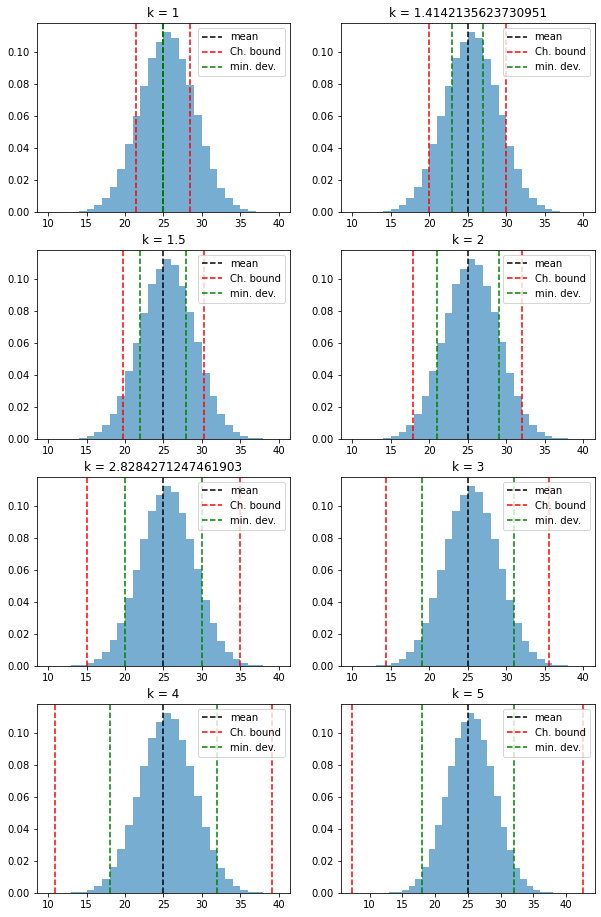

In [6]:
cols = 2
rows = int(len(ks)/2)
fig, axs = plt.subplots(rows, 2, figsize=(5*cols, 4*rows))
axs = axs.flatten()
for ax, k in zip(axs, ks):
    dev = k * xs.std()
    mean = xs.mean()
    ex = empirical_exceedance(xs, mean, 1/k**2)
    ax.hist(xs, density=True, bins=30, alpha=.6)
    ax.axvline(mean, color='black', label='mean', linestyle='--')
    ax.axvline(mean + dev, color='red', label='Ch. bound', linestyle='--')
    ax.axvline(mean - dev, color='red', linestyle='--')
    ax.axvline(mean + ex, color='green', linestyle='--', label='min. dev.')
    ax.axvline(mean - ex, color='green', linestyle='--')
    ax.set_title(f"k = {k}")
    ax.legend()
plt.show()

### b) Sample from the beta distribution

In [7]:
nb_samples = 10 ** 2
m = 1000

In [8]:
a = 0.5    # alpha parameter for beta distribution
b = 0.5    # beta parameter for beta distribution

true_mean = a / (a+b)

# sample xs
xs = beta(a, b, size=(nb_samples,))

### Hoeffding's inequality

In [17]:
epsilons = np.linspace(0.01, 0.1, 10)

bound_holds = np.zeros(m)
m_means = np.zeros(m)
for epsilon in epsilons:
    for i in range(m):
        zs = beta(a, b, size=(nb_samples,))
        m_means[i] = zs.mean()
        bound_holds[i] = 1 if np.abs(m_means[i] - true_mean) >= epsilon else 0
        prob_bound = 2*np.exp(-2*nb_samples*(epsilon**2))
    prob = bound_holds.mean()
    print(f"epsilon: {epsilon:.3f}   Bound: {prob_bound:.3f}   Prob: {prob:.3f}   Holds: {prob_bound >= prob}")
        

epsilon: 0.010   Bound: 1.960   Prob: 0.784   Holds: True
epsilon: 0.020   Bound: 1.846   Prob: 0.563   Holds: True
epsilon: 0.030   Bound: 1.671   Prob: 0.372   Holds: True
epsilon: 0.040   Bound: 1.452   Prob: 0.256   Holds: True
epsilon: 0.050   Bound: 1.213   Prob: 0.158   Holds: True
epsilon: 0.060   Bound: 0.974   Prob: 0.084   Holds: True
epsilon: 0.070   Bound: 0.751   Prob: 0.038   Holds: True
epsilon: 0.080   Bound: 0.556   Prob: 0.022   Holds: True
epsilon: 0.090   Bound: 0.396   Prob: 0.013   Holds: True
epsilon: 0.100   Bound: 0.271   Prob: 0.003   Holds: True


### Plot the empirical distribution and indicate the Hoeffding bounds

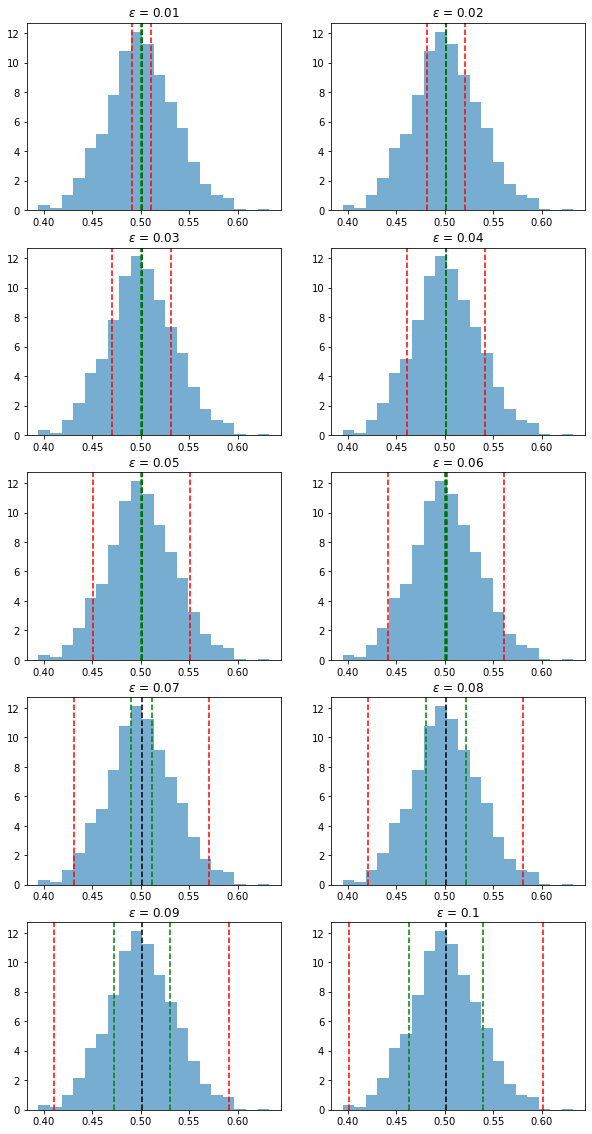

In [33]:
# plot histogram, Hoeffding's bounds and empirical bounds for eps in epsilons
cols = 2
rows = int(epsilons.size/cols)
fig, axs = plt.subplots(rows, 2, figsize=(5*cols, 4*rows))
axs = axs.flatten()
for ax, epsilon in zip(axs, epsilons):
    mean = m_means.mean()
    prob_bound = 2*np.exp(-2*nb_samples*(epsilon**2))
    ex = empirical_exceedance(m_means, true_mean, np.min([prob_bound, 1]))
    ax.hist(m_means, density=True, bins=20, alpha=.6)
    ax.axvline(true_mean, color='black', linestyle='--')
    ax.axvline(true_mean + epsilon, color='red', linestyle='--')
    ax.axvline(true_mean - epsilon, color='red', linestyle='--')
    ax.axvline(true_mean + ex, color='green', linestyle='--', label='min. dev.')
    ax.axvline(true_mean - ex, color='green', linestyle='--')
    ax.set_title(f"$\epsilon$ = {epsilon.round(4)}")
plt.show()

### c) Student-t distribution with 10 degrees of freedom

In [34]:
nb_samples = 10 ** 2
m = 1000

epsilon: 0.050   Bound: 1.213   Prob: 0.667   Holds: True
epsilon: 0.055   Bound: 1.092   Prob: 0.635   Holds: True
epsilon: 0.060   Bound: 0.974   Prob: 0.608   Holds: True
epsilon: 0.065   Bound: 0.859   Prob: 0.571   Holds: True
epsilon: 0.070   Bound: 0.751   Prob: 0.536   Holds: True
epsilon: 0.075   Bound: 0.649   Prob: 0.508   Holds: True
epsilon: 0.080   Bound: 0.556   Prob: 0.476   Holds: True
epsilon: 0.085   Bound: 0.471   Prob: 0.453   Holds: True
epsilon: 0.090   Bound: 0.396   Prob: 0.426   Holds: False
epsilon: 0.095   Bound: 0.329   Prob: 0.401   Holds: False
epsilon: 0.100   Bound: 0.271   Prob: 0.375   Holds: False


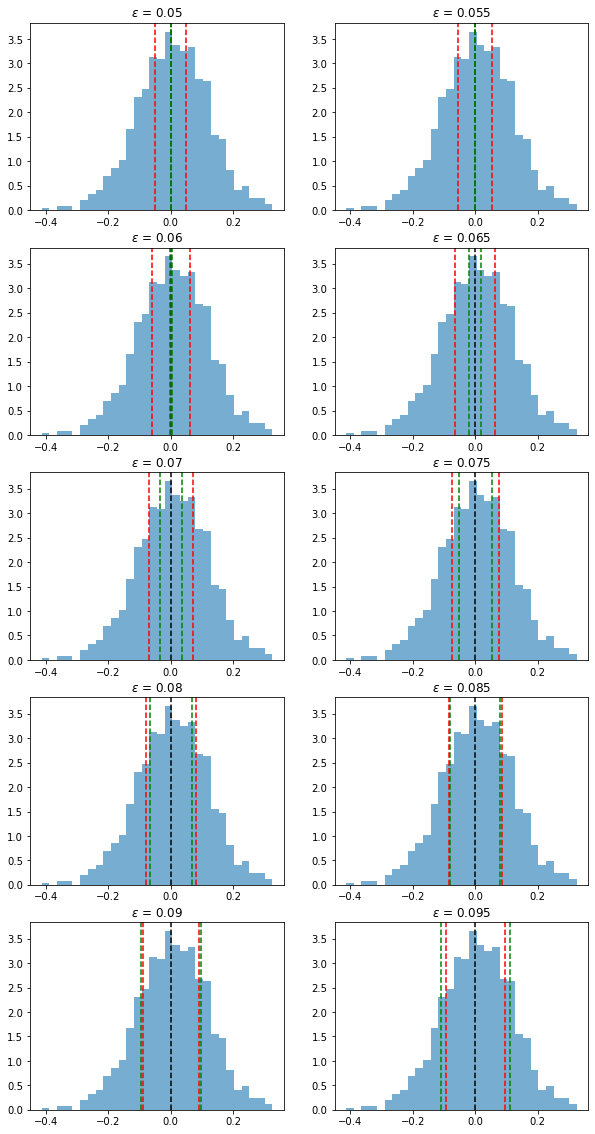

In [47]:
epsilons = np.linspace(0.05, 0.1, 11)
xs = standard_t(10, size=(m, nb_samples))

true_mean = 0

m_means = xs.mean(axis=1)
for epsilon in epsilons:
    bound_holds = np.zeros(m)
    for i, mean in enumerate(m_means):
        bound_holds[i] = 1 if np.abs(mean - true_mean) >= epsilon else 0
        prob_bound = 2*np.exp(-2*nb_samples*(epsilon**2))
    prob = bound_holds.mean()
    print(f"epsilon: {epsilon:.3f}   Bound: {prob_bound:.3f}   Prob: {prob:.3f}   Holds: {prob_bound >= prob}")

cols = 2
rows = int(epsilons.size/cols)
fig, axs = plt.subplots(rows, 2, figsize=(5*cols, 4*rows))
axs = axs.flatten()
for ax, epsilon in zip(axs, epsilons):
    mean = m_means.mean()
    prob_bound = 2*np.exp(-2*nb_samples*(epsilon**2))
    ex = empirical_exceedance(m_means, true_mean, np.min([prob_bound, 1]))
    ax.hist(m_means, density=True, bins=30, alpha=.6)
    ax.axvline(true_mean, color='black', linestyle='--')
    ax.axvline(true_mean + epsilon, color='red', linestyle='--')
    ax.axvline(true_mean - epsilon, color='red', linestyle='--')
    ax.axvline(true_mean + ex, color='green', linestyle='--', label='min. dev.')
    ax.axvline(true_mean - ex, color='green', linestyle='--')
    ax.set_title(f"$\epsilon$ = {epsilon.round(4)}")
plt.show()

### Why does the result occur?